In [2]:
# Libraries to work with dataframe
import json
import pandas as pd
import numpy as np
# Libraries for datetime
import datetime as dt
# Libraries for EDA
import matplotlib as plt
import seaborn as sns
# Libraries for ML
from sklearn import linear_model, datasets
import statsmodels.api as sm

In [3]:
# Load the data
df3=pd.read_csv(r'/Users/tinapham/Desktop/lighthouse-data-notes/ProJect/LHL_Midterm_Project/Data/Cleanjobdf/Cleanjobdf.csv', sep=",")
# Check dataset
df3.head()

,Time,Time Code,Country Name,Country Code,employer_pct_female,employer_pct_male,employer_pct_total,industry_pct_female,industry_pct_male,industry_pct_total,...,intermediate_education_pct_male,basic_education_pct_total,basic_education_pct_female,basic_education_pct_male,wages_and_salaries-pct_female,wages_and_salaries_pct_male,wages_and_salaries_pct_total,Laborforce_pop_total,Population_total,Population_density
0,2000-01-01,YR2000,United States,USA,2.240000,5.507000,4.021000,23.322001,12.174000,32.632000,...,65.277100,28.297300,51.912498,40.087200,91.585999,86.290001,88.699997,146767599.0,282162411.0,30.797301
1,2000-01-01,YR2000,United Kingdom,GBR,1.672000,4.500000,3.212000,25.167000,11.953000,36.221001,...,82.661201,63.468300,76.823196,69.078598,92.141998,83.941002,87.676003,29295681.0,58892514.0,243.427909
2,2000-01-01,YR2000,European Union,EUU,2.771487,6.901186,5.123410,29.391753,16.766526,38.940407,...,69.643060,34.678472,55.798056,43.627717,85.157378,79.046368,81.677008,228526899.0,488178832.0,115.084593
3,2000-01-01,YR2000,Europe & Central Asia,ECS,2.444044,5.616116,4.226875,27.987970,17.433606,36.217034,...,0.000000,0.000000,0.000000,0.000000,81.372209,77.657763,79.284578,397686380.0,862304086.0,31.414610
4,2000-01-01,YR2000,Canada,CAN,3.274000,7.503000,5.567000,22.475000,11.167000,32.016998,...,70.049301,42.889599,60.496498,51.746498,87.636002,80.613998,83.828003,16235249.0,30769700.0,3.383699


In [4]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 221 entries, 0 to 220
Data columns (total 34 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Time                               221 non-null    object 
 1   Time Code                          221 non-null    object 
 2   Country Name                       221 non-null    object 
 3   Country Code                       221 non-null    object 
 4   employer_pct_female                221 non-null    float64
 5   employer_pct_male                  221 non-null    float64
 6   employer_pct_total                 221 non-null    float64
 7   industry_pct_female                221 non-null    float64
 8   industry_pct_male                  221 non-null    float64
 9   industry_pct_total                 221 non-null    float64
 10  service_pct_female                 221 non-null    float64
 11  service_pct_male                   221 non-null    float64

In [5]:
# Create df_female with data from column 0 to 3
df_female = df3.iloc[:, 0:4]

# Create a gender column and fill in female
df_female['gender']= ["female" for i in range(len(df_female))]

# Filter all the column from df3 that has the word "female in column"
df_female=pd.concat([df_female, df3.filter(regex='female')], axis=1)

# All population info to female data frame
df_female= pd.concat([df_female, df3.iloc[:, 31:34]], axis=1)

df_female.head()

,Time,Time Code,Country Name,Country Code,gender,employer_pct_female,industry_pct_female,service_pct_female,agriculture_pct_female,laborforce_pct_female,advance_education_pct_female,intermediate_education_pct_female,basic_education_pct_female,wages_and_salaries-pct_female,Laborforce_pop_total,Population_total,Population_density
0,2000-01-01,YR2000,United States,USA,female,2.240000,23.322001,74.844002,2.569000,59.022999,84.552902,73.584801,51.912498,91.585999,146767599.0,282162411.0,30.797301
1,2000-01-01,YR2000,United Kingdom,GBR,female,1.672000,25.167000,73.297997,2.171000,53.554001,92.156303,86.192497,76.823196,92.141998,29295681.0,58892514.0,243.427909
2,2000-01-01,YR2000,European Union,EUU,female,2.771487,29.391753,62.666310,8.359486,47.703181,82.319485,75.869636,55.798056,85.157378,228526899.0,488178832.0,115.084593
3,2000-01-01,YR2000,Europe & Central Asia,ECS,female,2.444044,27.987970,57.232973,14.853220,48.672822,0.000000,0.000000,0.000000,81.372209,397686380.0,862304086.0,31.414610
4,2000-01-01,YR2000,Canada,CAN,female,3.274000,22.475000,74.237000,4.478000,58.647999,82.825500,77.127098,60.496498,87.636002,16235249.0,30769700.0,3.383699


In [6]:
df_female.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 221 entries, 0 to 220
Data columns (total 17 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Time                               221 non-null    object 
 1   Time Code                          221 non-null    object 
 2   Country Name                       221 non-null    object 
 3   Country Code                       221 non-null    object 
 4   gender                             221 non-null    object 
 5   employer_pct_female                221 non-null    float64
 6   industry_pct_female                221 non-null    float64
 7   service_pct_female                 221 non-null    float64
 8   agriculture_pct_female             221 non-null    float64
 9   laborforce_pct_female              221 non-null    float64
 10  advance_education_pct_female       221 non-null    float64
 11  intermediate_education_pct_female  221 non-null    float64

In [7]:
# Remove the word female to prepare to merge with male dataframe
df_female.columns = df_female.columns.str.replace("_female", '')
df_female.columns = df_female.columns.str.replace("-", '_')
df_female

,Time,Time Code,Country Name,Country Code,gender,employer_pct,industry_pct,service_pct,agriculture_pct,laborforce_pct,advance_education_pct,intermediate_education_pct,basic_education_pct,wages_and_salaries_pct,Laborforce_pop_total,Population_total,Population_density
0,2000-01-01,YR2000,United States,USA,female,2.240000,23.322001,74.844002,2.569000,59.022999,84.552902,73.584801,51.912498,91.585999,1.467676e+08,2.821624e+08,30.797301
1,2000-01-01,YR2000,United Kingdom,GBR,female,1.672000,25.167000,73.297997,2.171000,53.554001,92.156303,86.192497,76.823196,92.141998,2.929568e+07,5.889251e+07,243.427909
2,2000-01-01,YR2000,European Union,EUU,female,2.771487,29.391753,62.666310,8.359486,47.703181,82.319485,75.869636,55.798056,85.157378,2.285269e+08,4.881788e+08,115.084593
3,2000-01-01,YR2000,Europe & Central Asia,ECS,female,2.444044,27.987970,57.232973,14.853220,48.672822,0.000000,0.000000,0.000000,81.372209,3.976864e+08,8.623041e+08,31.414610
4,2000-01-01,YR2000,Canada,CAN,female,3.274000,22.475000,74.237000,4.478000,58.647999,82.825500,77.127098,60.496498,87.636002,1.623525e+07,3.076970e+07,3.383699
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
216,2016-01-01,YR2016,North America,NAC,female,2.202284,18.868170,79.441052,2.356258,56.490389,78.311200,65.500088,52.647089,92.255877,1.827033e+08,3.597359e+08,19.721302
217,2016-01-01,YR2016,East Asia & Pacific,EAS,female,1.670100,25.101919,53.396054,20.435278,59.558190,0.000000,0.000000,0.000000,60.630319,1.257026e+09,2.298727e+09,94.260256
218,2016-01-01,YR2016,South Asia,SAS,female,0.473881,22.806979,33.317010,38.460843,28.638290,0.000000,0.000000,0.000000,20.079093,6.830194e+08,1.766394e+09,370.190760
219,2016-01-01,YR2016,Europe & Central Asia (excluding high income),ECA,female,1.342485,26.885360,58.000830,15.100833,49.888776,79.190823,78.037187,40.358736,81.531868,1.945188e+08,4.132349e+08,18.266896


In [8]:
# Create df_male
df_male= df3.iloc[:, 0:4]

# Fill in male in gender column
df_male["gender"]=["male" for i in range(len(df_male))]

# Filter out column contain male
male_columns = [column for column in df3.columns if "male" in column and 'female' not in column]
male_df = df3[male_columns]
df_male=pd.concat([df_male, male_df], axis=1)

# Add population info to dataframe
df_male= pd.concat([df_male, df3.iloc[:, 31:34]], axis=1)

df_male.head()


,Time,Time Code,Country Name,Country Code,gender,employer_pct_male,industry_pct_male,service_pct_male,agriculture_pct_male,laborforce_pct_male,advance_education_pct_male,intermediate_education_pct_male,basic_education_pct_male,wages_and_salaries_pct_male,Laborforce_pop_total,Population_total,Population_density
0,2000-01-01,YR2000,United States,USA,male,5.507000,12.174000,86.873001,0.953000,74.226997,79.309700,65.277100,40.087200,86.290001,146767599.0,282162411.0,30.797301
1,2000-01-01,YR2000,United Kingdom,GBR,male,4.500000,11.953000,87.273003,0.774000,69.938004,89.738098,82.661201,69.078598,83.941002,29295681.0,58892514.0,243.427909
2,2000-01-01,YR2000,European Union,EUU,male,6.901186,16.766526,75.843510,7.389954,65.926715,80.505325,69.643060,43.627717,79.046368,228526899.0,488178832.0,115.084593
3,2000-01-01,YR2000,Europe & Central Asia,ECS,male,5.616116,17.433606,67.882932,14.683327,67.524257,0.000000,0.000000,0.000000,77.657763,397686380.0,862304086.0,31.414610
4,2000-01-01,YR2000,Canada,CAN,male,7.503000,11.167000,86.956001,1.877000,72.126999,78.557899,70.049301,51.746498,80.613998,16235249.0,30769700.0,3.383699


In [9]:
# Remove the world male in column tittle to merge with the female data 
df_male.columns = df_male.columns.str.replace("_male", '')
df_male

,Time,Time Code,Country Name,Country Code,gender,employer_pct,industry_pct,service_pct,agriculture_pct,laborforce_pct,advance_education_pct,intermediate_education_pct,basic_education_pct,wages_and_salaries_pct,Laborforce_pop_total,Population_total,Population_density
0,2000-01-01,YR2000,United States,USA,male,5.507000,12.174000,86.873001,0.953000,74.226997,79.309700,65.277100,40.087200,86.290001,1.467676e+08,2.821624e+08,30.797301
1,2000-01-01,YR2000,United Kingdom,GBR,male,4.500000,11.953000,87.273003,0.774000,69.938004,89.738098,82.661201,69.078598,83.941002,2.929568e+07,5.889251e+07,243.427909
2,2000-01-01,YR2000,European Union,EUU,male,6.901186,16.766526,75.843510,7.389954,65.926715,80.505325,69.643060,43.627717,79.046368,2.285269e+08,4.881788e+08,115.084593
3,2000-01-01,YR2000,Europe & Central Asia,ECS,male,5.616116,17.433606,67.882932,14.683327,67.524257,0.000000,0.000000,0.000000,77.657763,3.976864e+08,8.623041e+08,31.414610
4,2000-01-01,YR2000,Canada,CAN,male,7.503000,11.167000,86.956001,1.877000,72.126999,78.557899,70.049301,51.746498,80.613998,1.623525e+07,3.076970e+07,3.383699
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
216,2016-01-01,YR2016,North America,NAC,male,5.115226,8.298651,90.789771,0.911576,68.719933,73.751245,58.105411,41.589129,87.243744,1.827033e+08,3.597359e+08,19.721302
217,2016-01-01,YR2016,East Asia & Pacific,EAS,male,4.522867,19.794388,57.317600,22.888616,76.858791,0.000000,0.000000,0.000000,61.996702,1.257026e+09,2.298727e+09,94.260256
218,2016-01-01,YR2016,South Asia,SAS,male,2.042841,16.654725,23.449449,59.896117,79.528674,0.000000,0.000000,0.000000,26.813965,6.830194e+08,1.766394e+09,370.190760
219,2016-01-01,YR2016,Europe & Central Asia (excluding high income),ECA,male,3.195645,16.056263,68.813555,15.129961,70.483959,74.263246,67.509551,33.789998,78.082421,1.945188e+08,4.132349e+08,18.266896


In [10]:
# Stack df_male and df_female on top of each other
gender_data= pd.concat([df_female, df_male], ignore_index=True)

In [11]:
gender_data

,Time,Time Code,Country Name,Country Code,gender,employer_pct,industry_pct,service_pct,agriculture_pct,laborforce_pct,advance_education_pct,intermediate_education_pct,basic_education_pct,wages_and_salaries_pct,Laborforce_pop_total,Population_total,Population_density
0,2000-01-01,YR2000,United States,USA,female,2.240000,23.322001,74.844002,2.569000,59.022999,84.552902,73.584801,51.912498,91.585999,1.467676e+08,2.821624e+08,30.797301
1,2000-01-01,YR2000,United Kingdom,GBR,female,1.672000,25.167000,73.297997,2.171000,53.554001,92.156303,86.192497,76.823196,92.141998,2.929568e+07,5.889251e+07,243.427909
2,2000-01-01,YR2000,European Union,EUU,female,2.771487,29.391753,62.666310,8.359486,47.703181,82.319485,75.869636,55.798056,85.157378,2.285269e+08,4.881788e+08,115.084593
3,2000-01-01,YR2000,Europe & Central Asia,ECS,female,2.444044,27.987970,57.232973,14.853220,48.672822,0.000000,0.000000,0.000000,81.372209,3.976864e+08,8.623041e+08,31.414610
4,2000-01-01,YR2000,Canada,CAN,female,3.274000,22.475000,74.237000,4.478000,58.647999,82.825500,77.127098,60.496498,87.636002,1.623525e+07,3.076970e+07,3.383699
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
437,2016-01-01,YR2016,North America,NAC,male,5.115226,8.298651,90.789771,0.911576,68.719933,73.751245,58.105411,41.589129,87.243744,1.827033e+08,3.597359e+08,19.721302
438,2016-01-01,YR2016,East Asia & Pacific,EAS,male,4.522867,19.794388,57.317600,22.888616,76.858791,0.000000,0.000000,0.000000,61.996702,1.257026e+09,2.298727e+09,94.260256
439,2016-01-01,YR2016,South Asia,SAS,male,2.042841,16.654725,23.449449,59.896117,79.528674,0.000000,0.000000,0.000000,26.813965,6.830194e+08,1.766394e+09,370.190760
440,2016-01-01,YR2016,Europe & Central Asia (excluding high income),ECA,male,3.195645,16.056263,68.813555,15.129961,70.483959,74.263246,67.509551,33.789998,78.082421,1.945188e+08,4.132349e+08,18.266896


In [12]:
# gender_data.to_csv(r'/Users/tinapham/Desktop/lighthouse-data-notes/ProJect/LHL_Midterm_Project/Data/Cleanjobdf/gender_df.csv', index= False)

### EDA

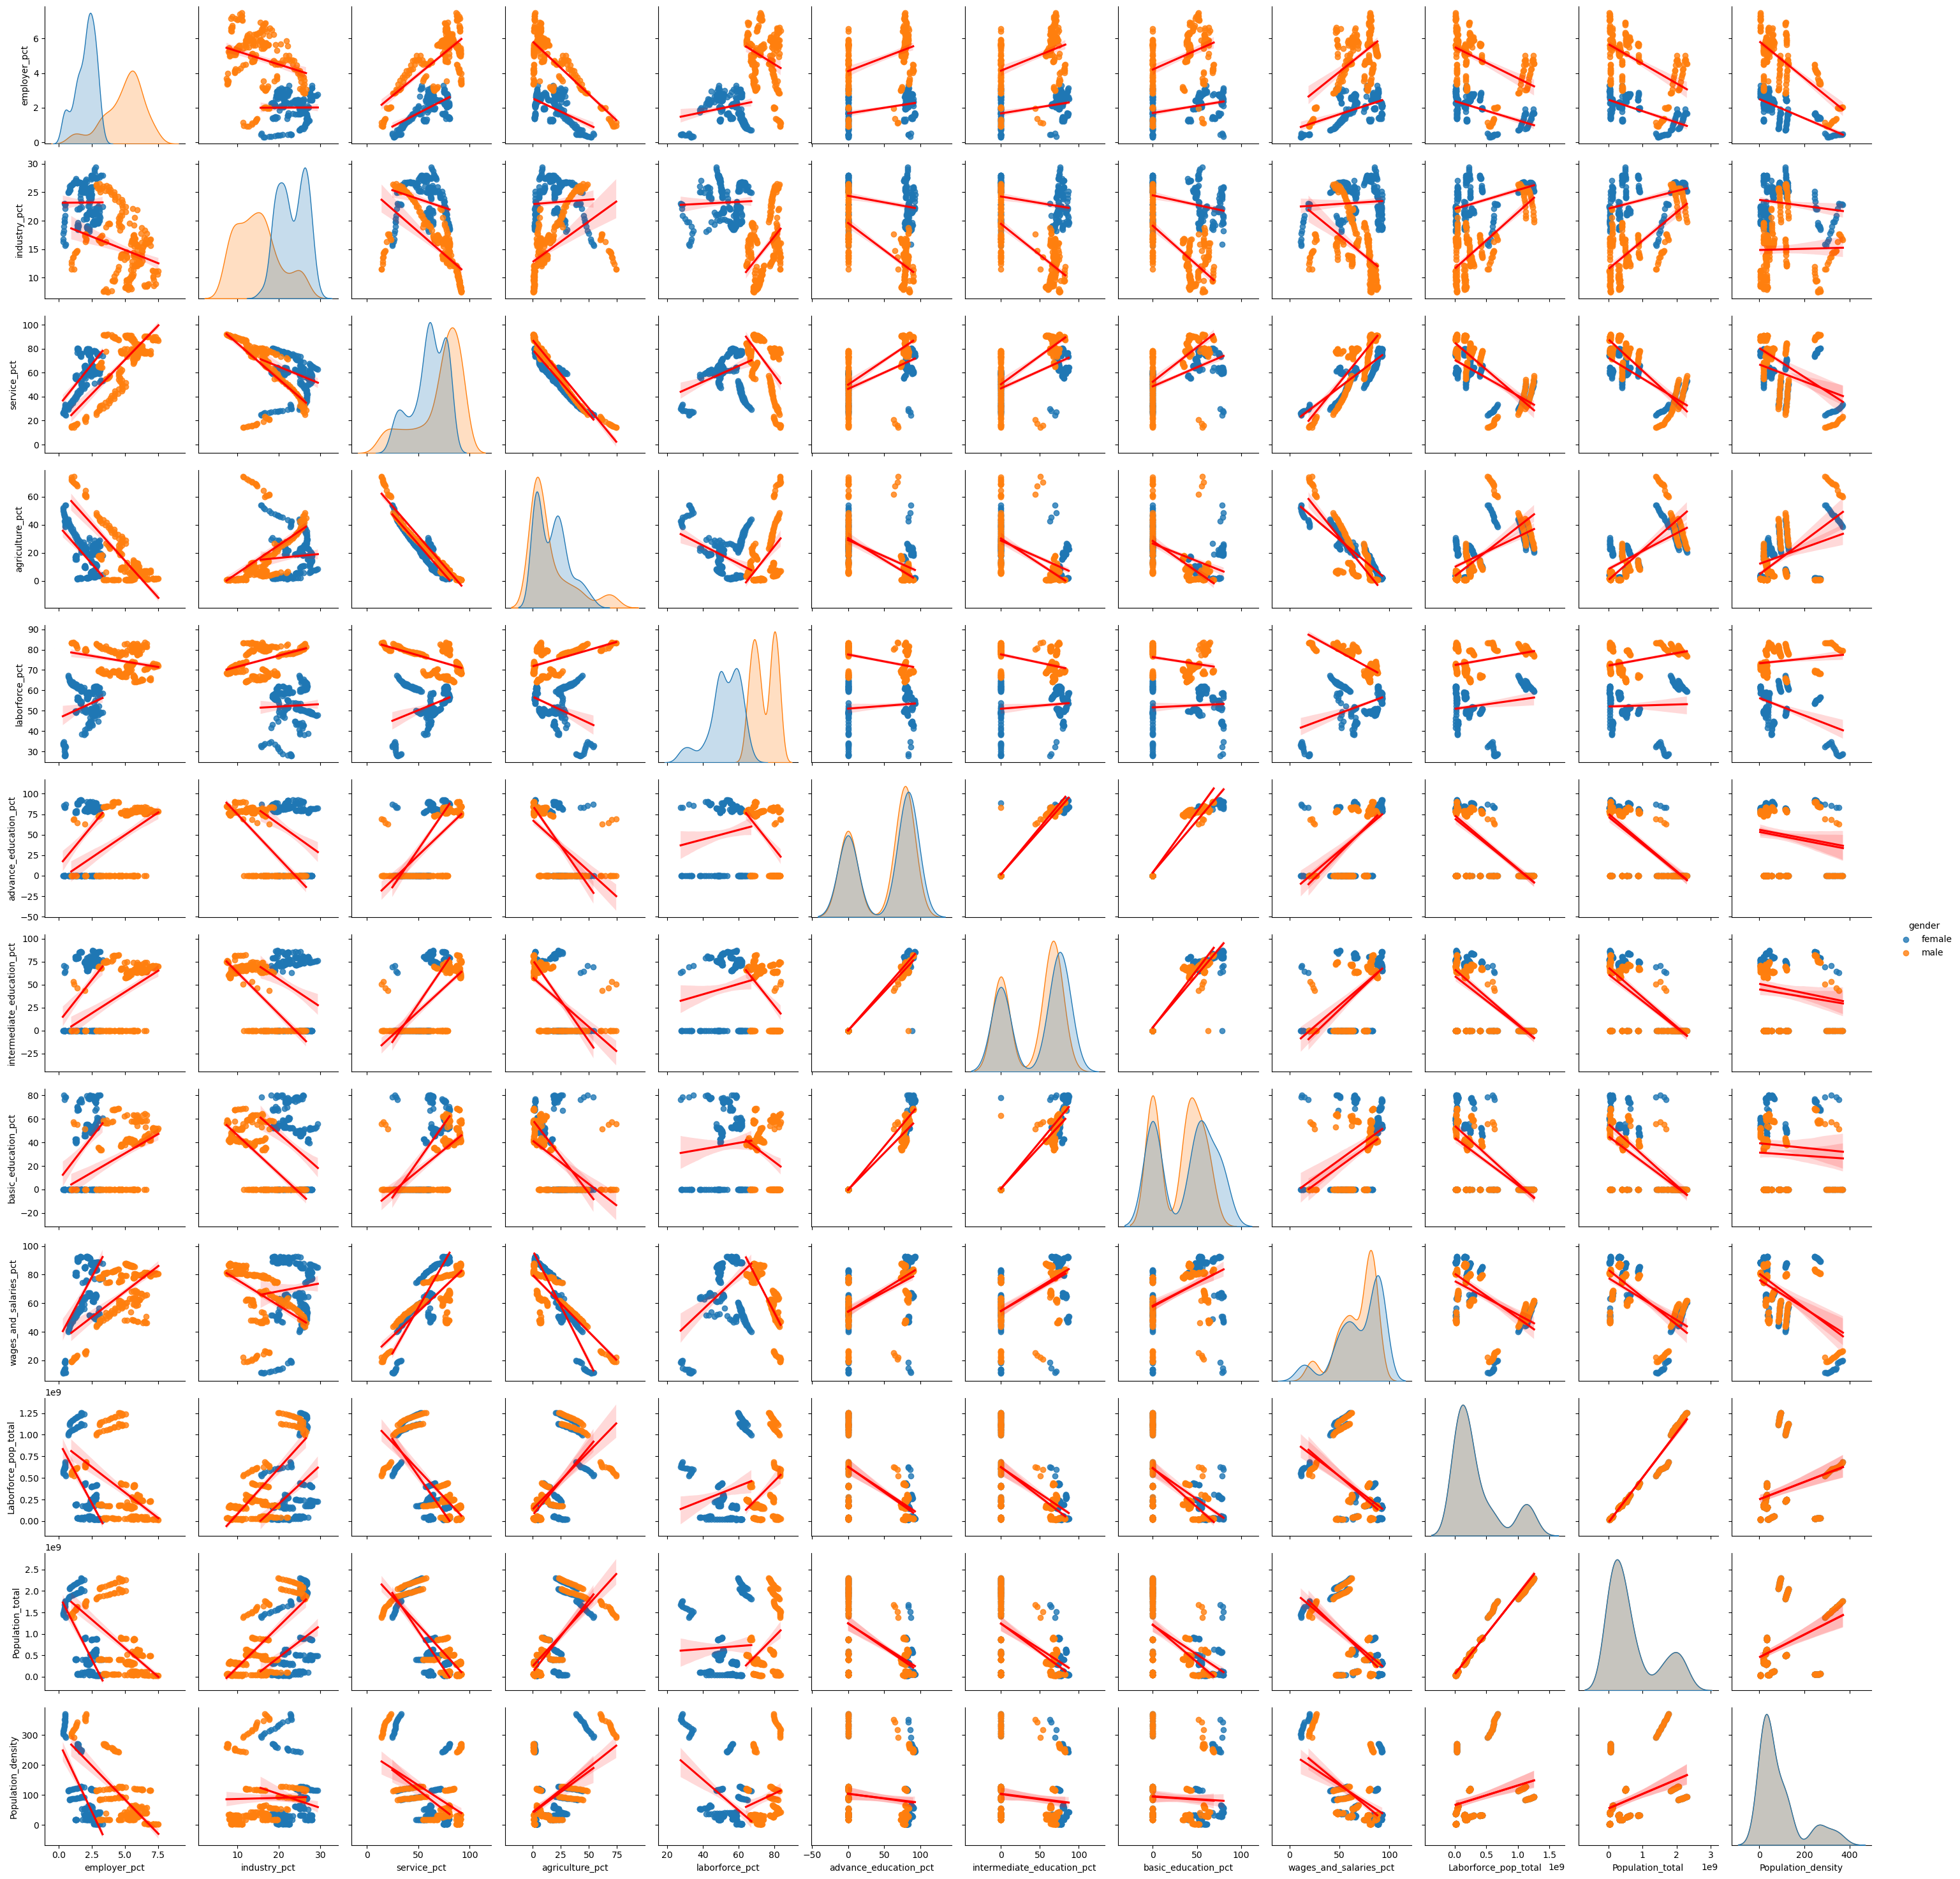

In [14]:
fig_1=sns.pairplot(data=gender_data,
                    hue='gender',
                    kind='reg', 
                    diag_kind='kde',
                    plot_kws={'line_kws':{'color':'red'}})


In [ ]:
# Calculate the correlation of different industry and % of employment
corr=gender_data.corr()
corr

/var/folders/4c/r7kxsc7j67gd7wlqt50rmb100000gn/T/ipykernel_19567/2904926753.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr=gender_data.corr()


,employer_pct,industry_pct,service_pct,agriculture_pct,laborforce_pct,advance_education_pct,intermediate_education_pct,basic_education_pct,wages_and_salaries_pct,Laborforce_pop_total,Population_total,Population_density
employer_pct,1.000000,-0.629026,0.617978,-0.503535,0.625679,0.208549,0.172041,0.109110,0.277708,-0.296592,-0.344293,-0.418761
industry_pct,-0.629026,1.000000,-0.558845,0.319885,-0.470012,-0.358575,-0.309965,-0.262083,-0.127331,0.419067,0.391136,-0.034213
service_pct,0.617978,-0.558845,1.000000,-0.956907,0.148339,0.662423,0.640562,0.557740,0.790640,-0.706511,-0.775390,-0.462967
agriculture_pct,-0.503535,0.319885,-0.956907,1.000000,-0.026936,-0.630485,-0.618014,-0.529088,-0.861302,0.632218,0.717099,0.506731
laborforce_pct,0.625679,-0.470012,0.148339,-0.026936,1.000000,-0.081755,-0.110223,-0.135919,-0.050968,0.139758,0.095494,-0.113995
advance_education_pct,0.208549,-0.358575,0.662423,-0.630485,-0.081755,1.000000,0.983649,0.959715,0.572275,-0.604295,-0.617458,-0.128568
intermediate_education_pct,0.172041,-0.309965,0.640562,-0.618014,-0.110223,0.983649,1.000000,0.950471,0.566870,-0.602715,-0.618467,-0.124720
basic_education_pct,0.109110,-0.262083,0.557740,-0.529088,-0.135919,0.959715,0.950471,1.000000,0.448301,-0.588976,-0.597596,-0.055435
wages_and_salaries_pct,0.277708,-0.127331,0.790640,-0.861302,-0.050968,0.572275,0.566870,0.448301,1.000000,-0.501796,-0.589312,-0.510844
Laborforce_pop_total,-0.296592,0.419067,-0.706511,0.632218,0.139758,-0.604295,-0.602715,-0.588976,-0.501796,1.000000,0.984572,0.256721


<AxesSubplot:>

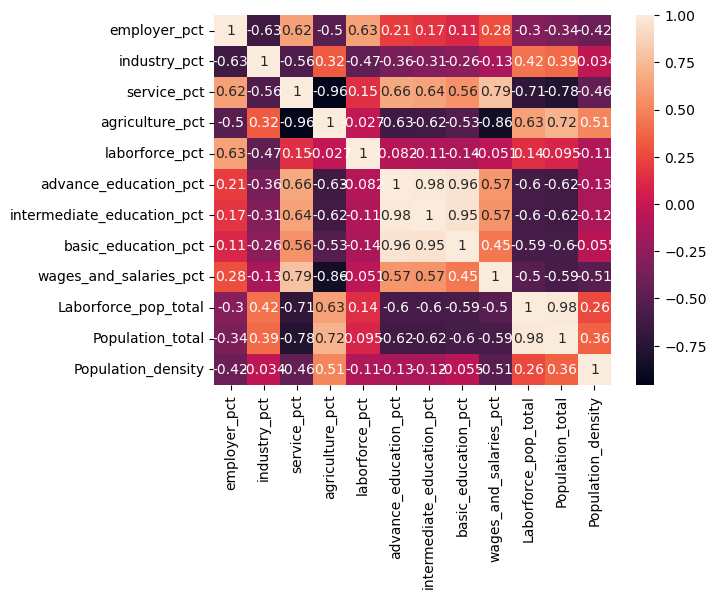

In [ ]:
# Create a heat map with correlation data
sns.heatmap(data= corr, annot=True)

In [ ]:
import statsmodels.api as sm
y = gender_data[['employer_pct']]
X = gender_data[['industry_pct',
                'service_pct',	
                'agriculture_pct',
                'laborforce_pct',
                'advance_education_pct',
                'basic_education_pct',
                'wages_and_salaries_pct']]
X = sm.add_constant(X)
X.head()

,const,industry_pct,service_pct,agriculture_pct,laborforce_pct,advance_education_pct,basic_education_pct,wages_and_salaries_pct
0,1.0,23.322001,74.844002,2.569000,59.022999,84.552902,51.912498,91.585999
1,1.0,25.167000,73.297997,2.171000,53.554001,92.156303,76.823196,92.141998
2,1.0,29.391753,62.666310,8.359486,47.703181,82.319485,55.798056,85.157378
3,1.0,27.987970,57.232973,14.853220,48.672822,0.000000,0.000000,81.372209
4,1.0,22.475000,74.237000,4.478000,58.647999,82.825500,60.496498,87.636002


In [ ]:
model = sm.OLS(y, X) 
results = model.fit() 
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:           employer_pct   R-squared:                       0.748
Model:                            OLS   Adj. R-squared:                  0.744
Method:                 Least Squares   F-statistic:                     184.3
Date:                Wed, 12 Jul 2023   Prob (F-statistic):          1.07e-125
Time:                        04:49:28   Log-Likelihood:                -595.41
No. Observations:                 442   AIC:                             1207.
Df Residuals:                     434   BIC:                             1240.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                     -8

In [ ]:
#import statsmodels.formula.api as smf
#logit = smf.logit("employer_pct ~ sex + service_pct", data=gender_data) 

ValueError: endog must be in the unit interval.

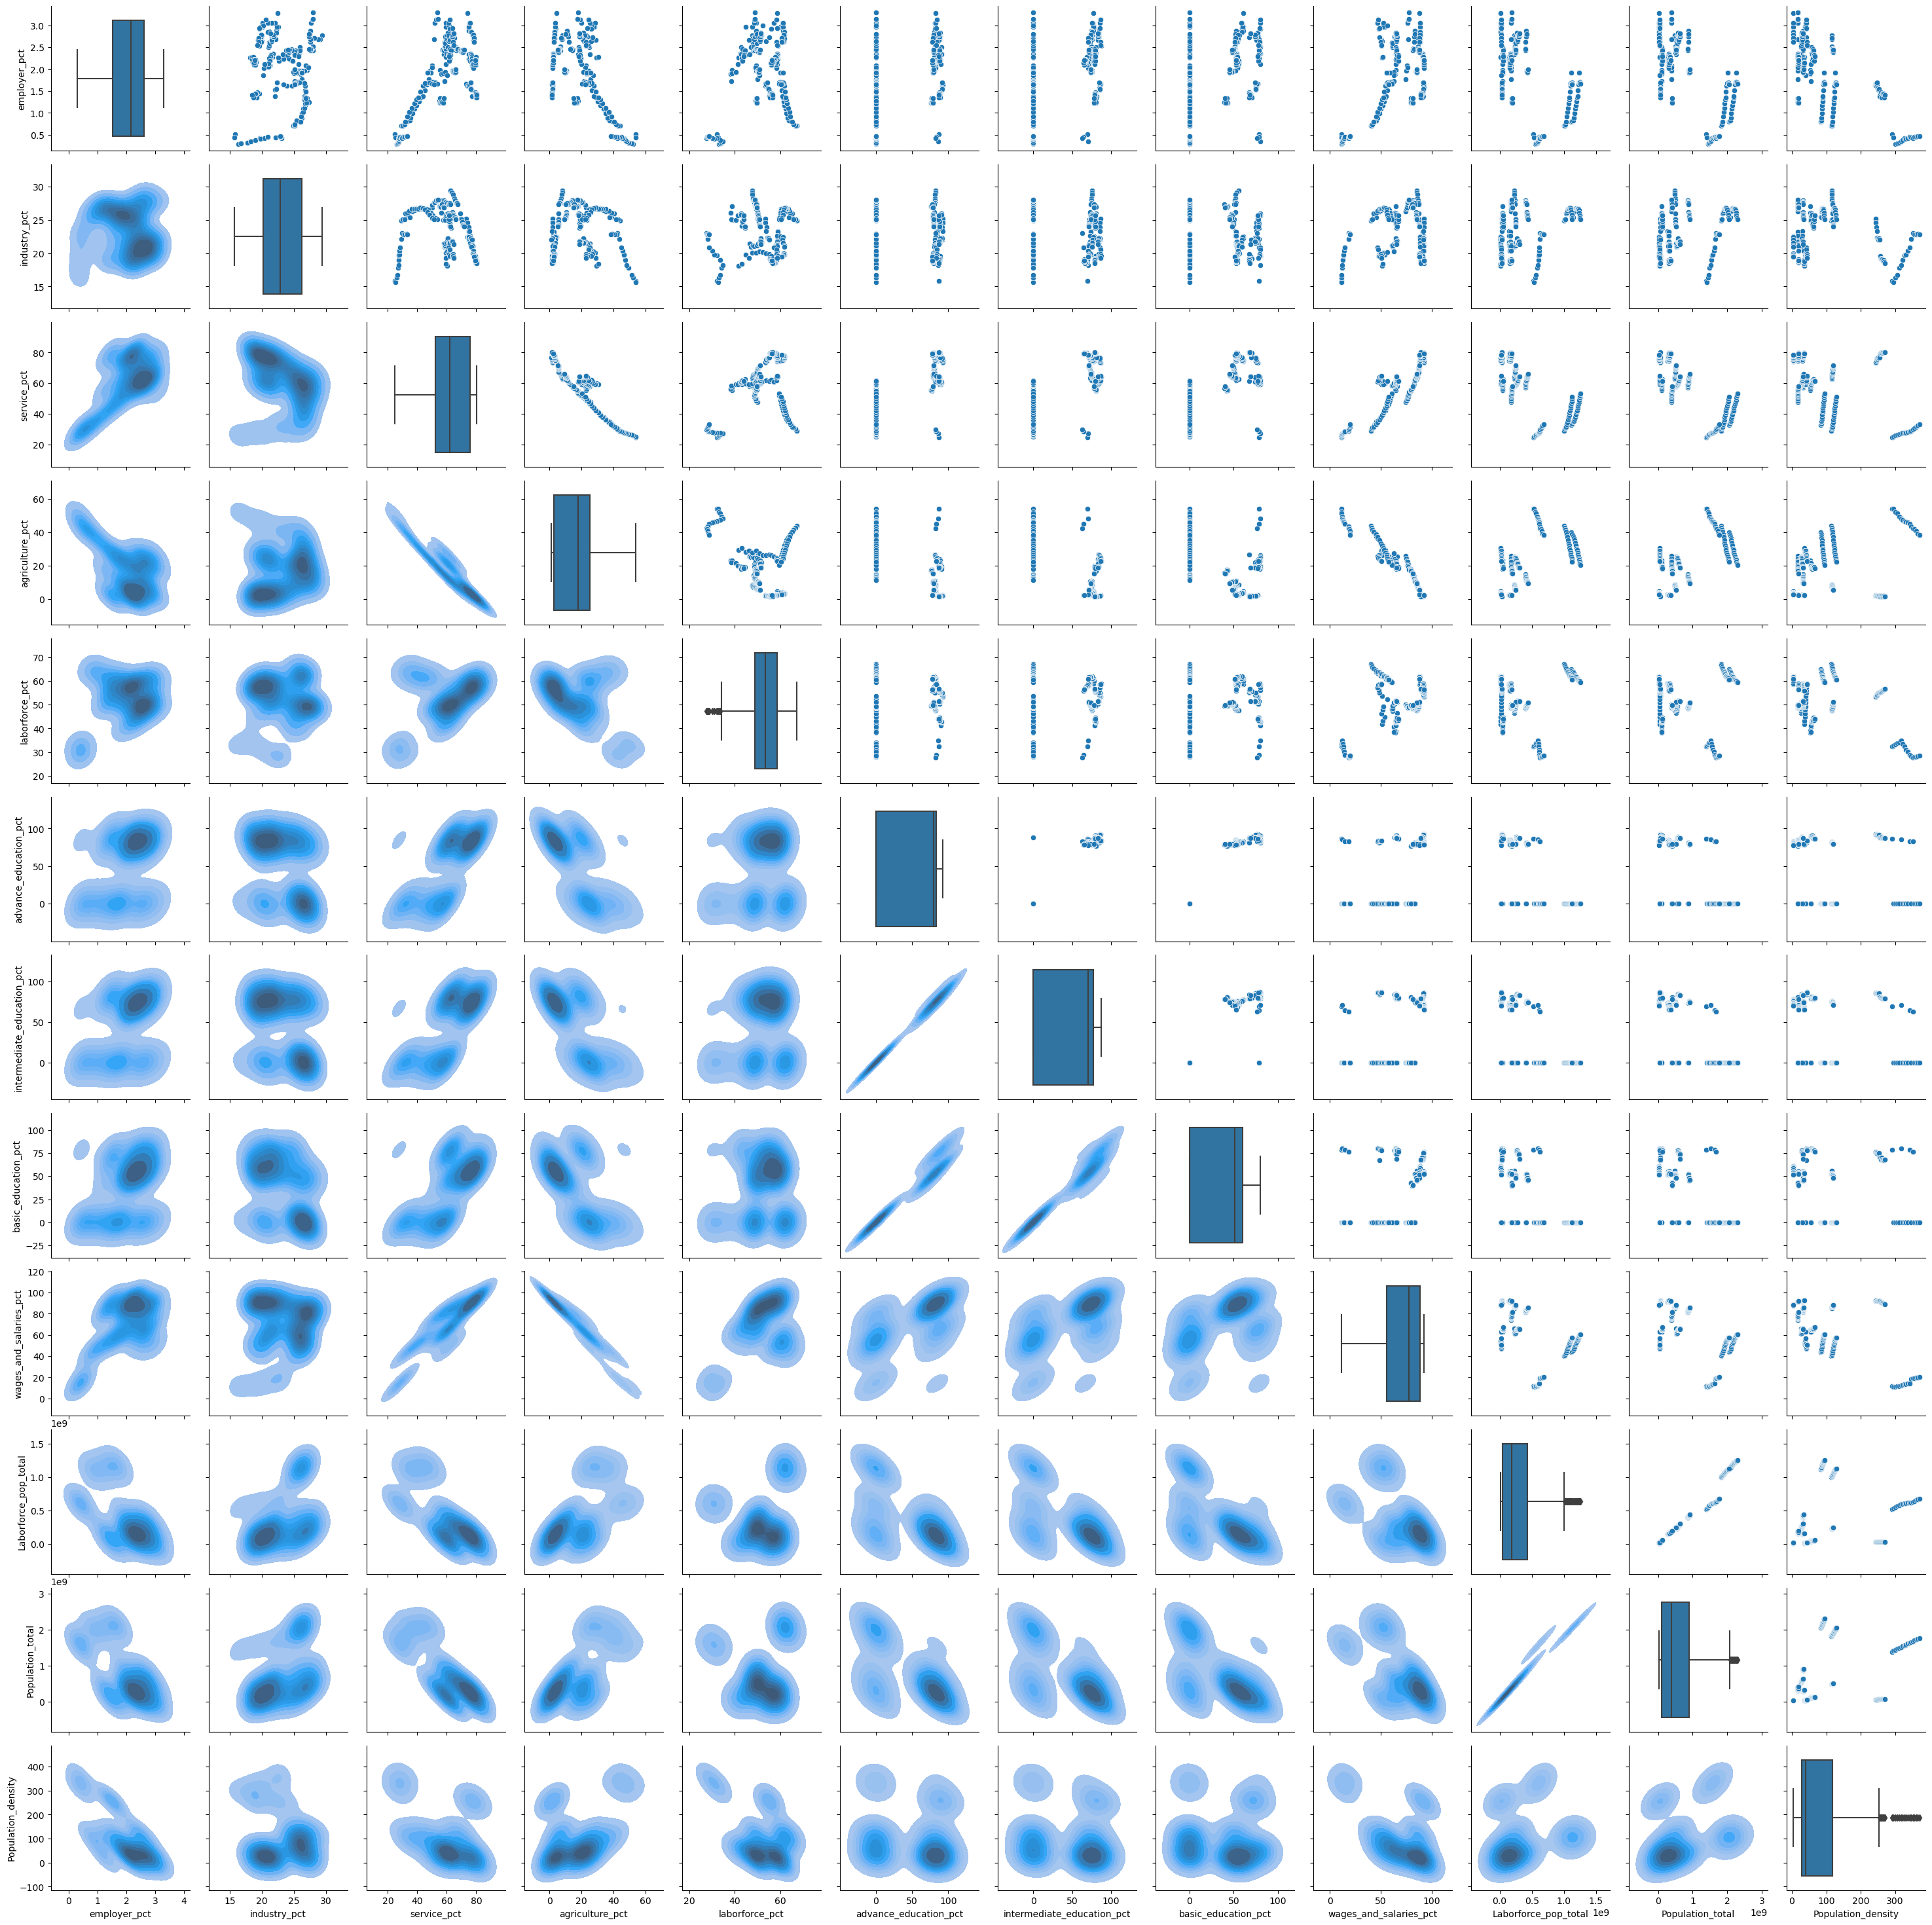

In [24]:
fig_2=sns.PairGrid(data=df_female)
fig_2.map_upper(sns.scatterplot)      # put in a seaborn function
fig_2.map_lower(sns.kdeplot, fill=True)
fig_2.map_diag(sns.boxplot)